In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
df = pd.read_csv("winequality-red.csv")
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
30              6.7             0.675         0.07             2.4      0.089   
588             5.0             0.420         0.24             2.0      0.060   
1591            5.4             0.740         0.09             1.7      0.089   
60              8.8             0.400         0.40             2.2      0.079   
325            10.0             0.490         0.20            11.0      0.071   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
30                   17.0                  82.0  0.99580  3.35       0.54   
588                  19.0                  50.0  0.99170  3.72       0.74   
1591                 16.0                  26.0  0.99402  3.67       0.56   
60                   19.0                  52.0  0.99800  3.44       0.64   
325                  13.0                  50.0  1.00150  3.16       0.69   

      alcohol  quality  
30       10.1        5  
588      14.0        8  
1591     11.6        6  
60        9.2        5  
325       9.2        6

In [3]:
df.shape

(1599, 12)

This dataset contain 1599 rows and 12 columns.

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

This dataset contain 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'quality' columns.

In [5]:
df.isnull().sum() / df.shape[1]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

There are no missing values in that dataset.

In [6]:
df.duplicated().sum()

240

There are 240 duplicate values in that dataset. Now drop these duplicate values.

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
522             8.2             0.390         0.49             2.3      0.099   
771             9.4             0.685         0.26             2.4      0.082   
1183            6.8             0.660         0.07             1.6      0.070   
482            10.6             0.360         0.59             2.2      0.152   
151             9.2             0.520         1.00             3.4      0.610   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
522                  47.0                 133.0  0.99790  3.38       0.99   
771                  23.0                 143.0  0.99780  3.28       0.55   
1183                 16.0                  61.0  0.99572  3.29       0.60   
482                   6.0                  18.0  0.99860  3.04       1.05   
151                  32.0                  69.0  0.99960  2.74       2.00   

      alcohol  quality  
522       9.8        5  
771       9.4        5  
1183      9.3        5  
482       9.4        5  
151       9.4        4

In [9]:
df.shape

(1359, 12)

Now dataset contain 1359 rows and 12 columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [11]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


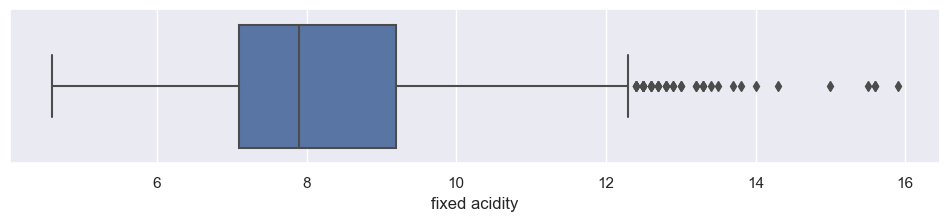

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


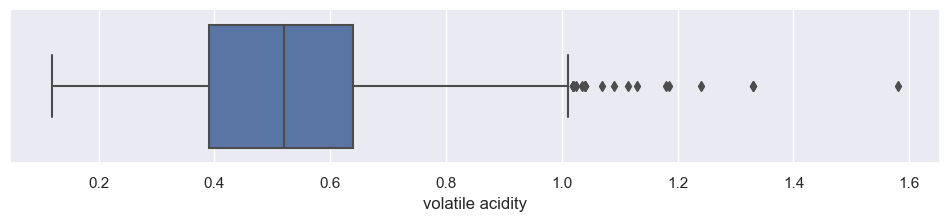

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


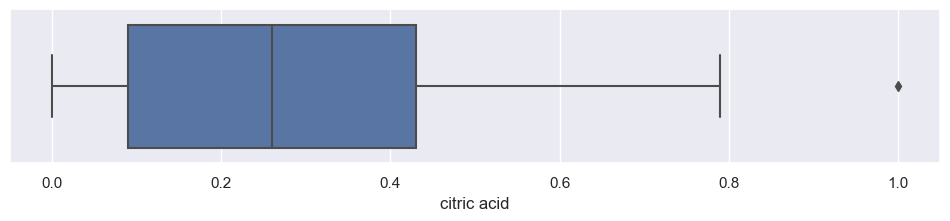

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


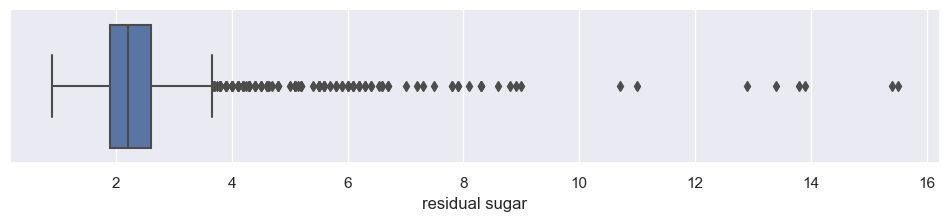

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


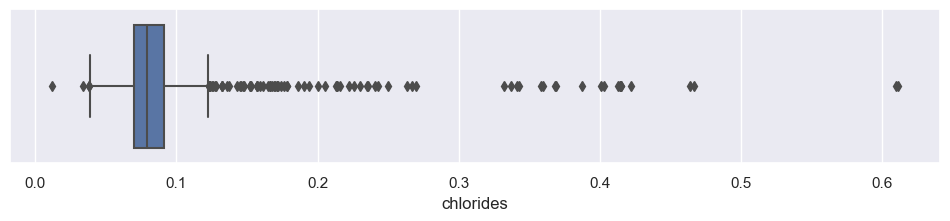

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


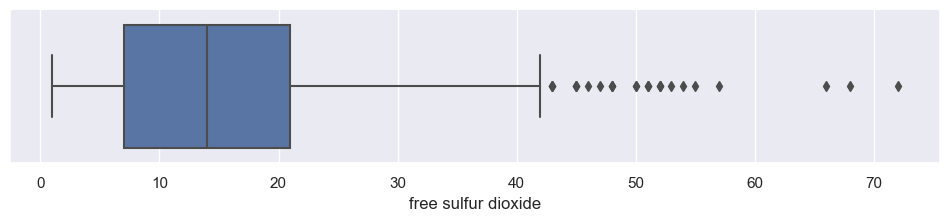

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


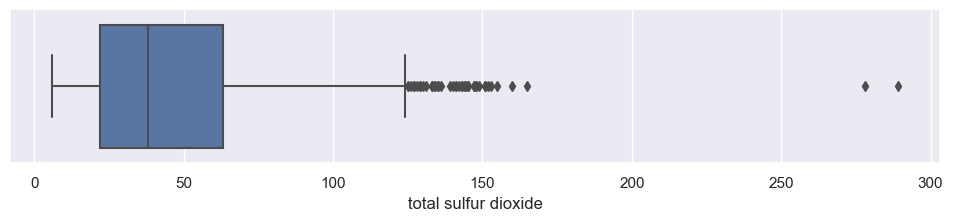

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


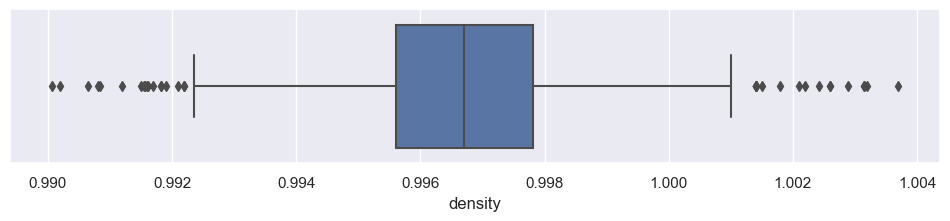

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


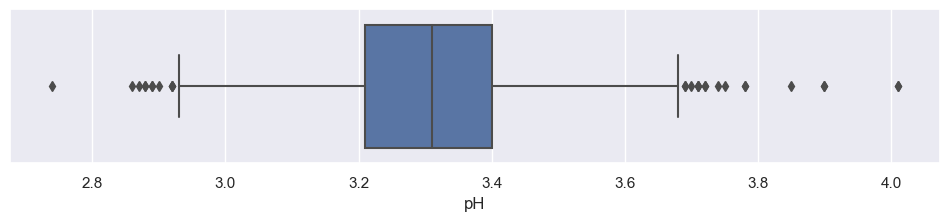

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


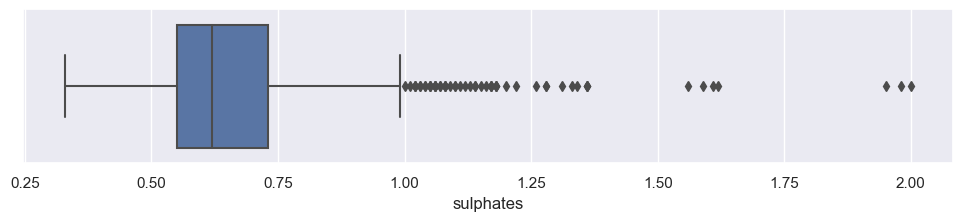

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


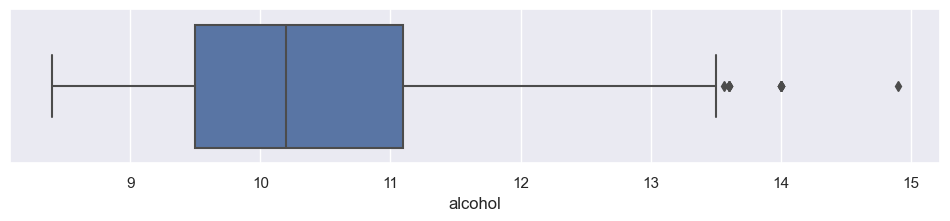

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


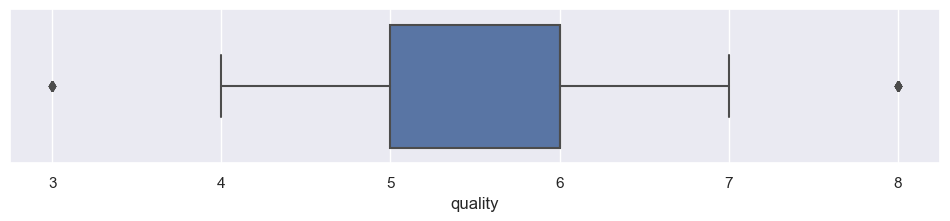

In [12]:
for x in df.columns:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(df[x])
    plt.show()

There are some outlier values in that dataset.haddle these values in later.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

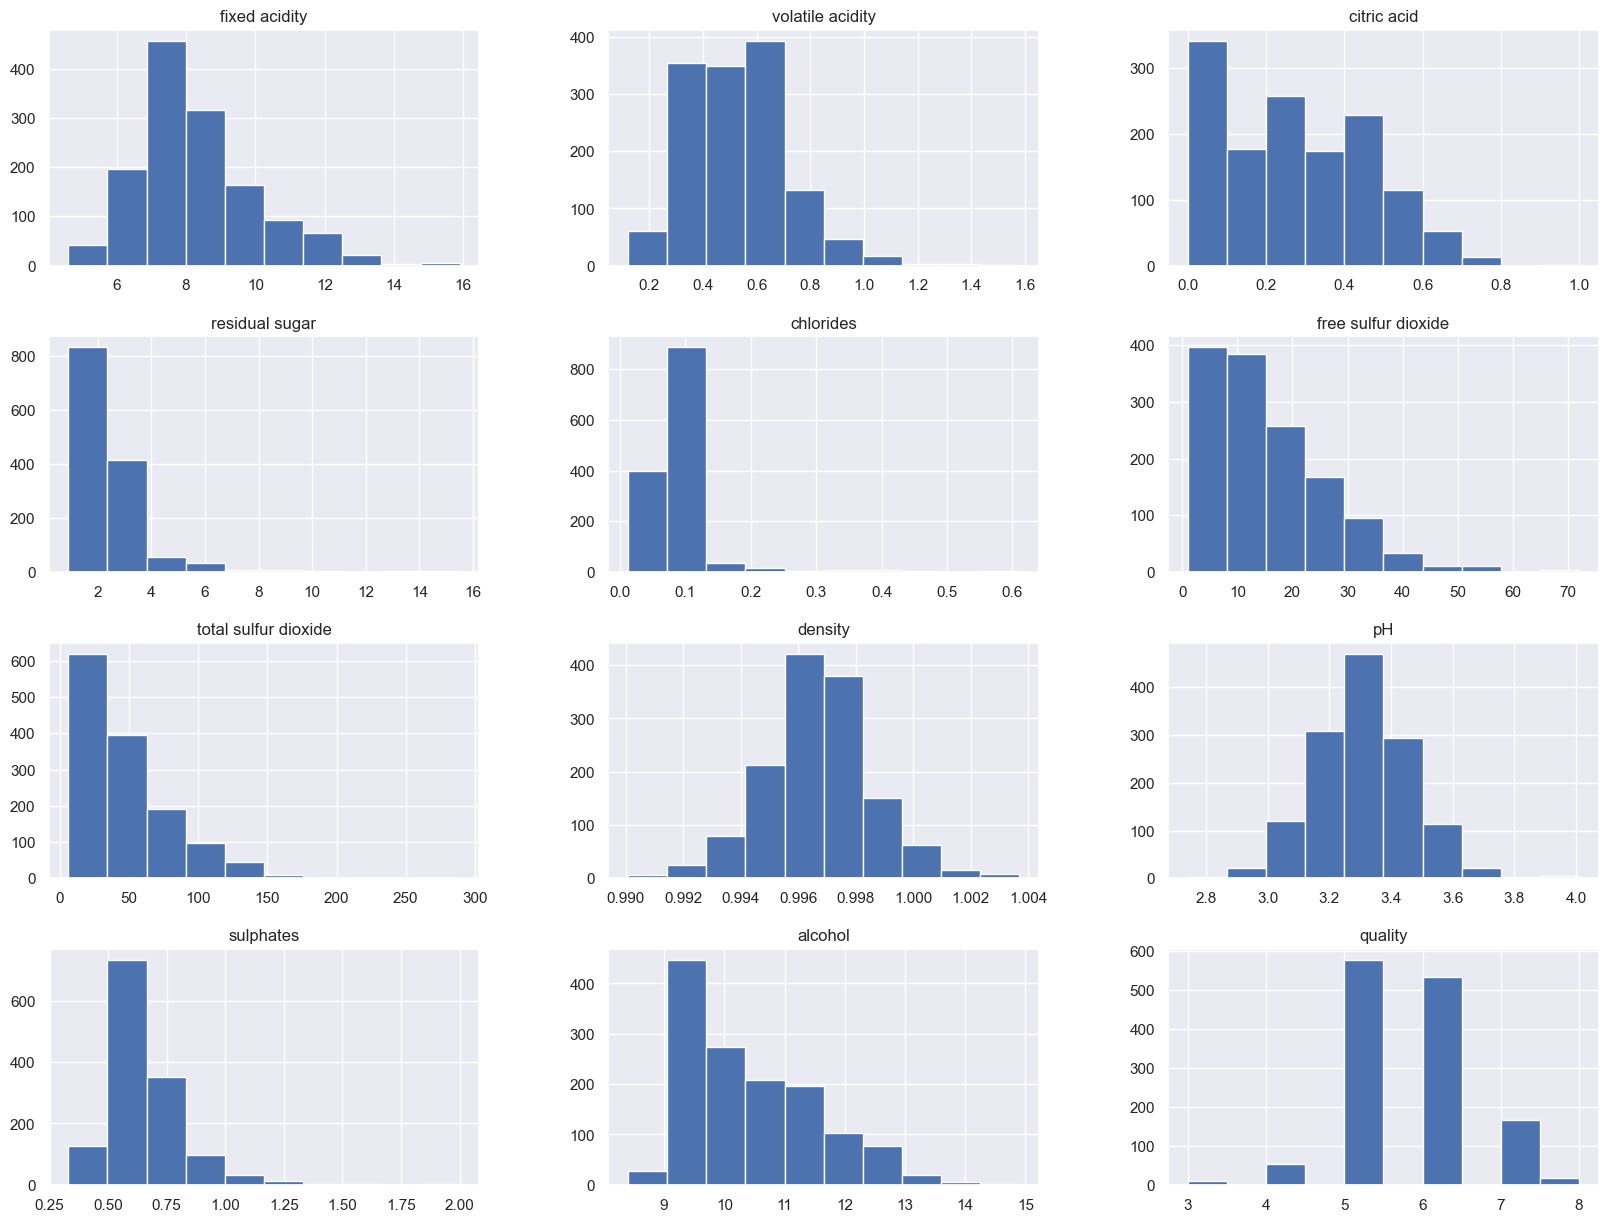

In [13]:
df.hist(figsize = (20, 15))

In [14]:
sns.pairplot(df, height = 10)

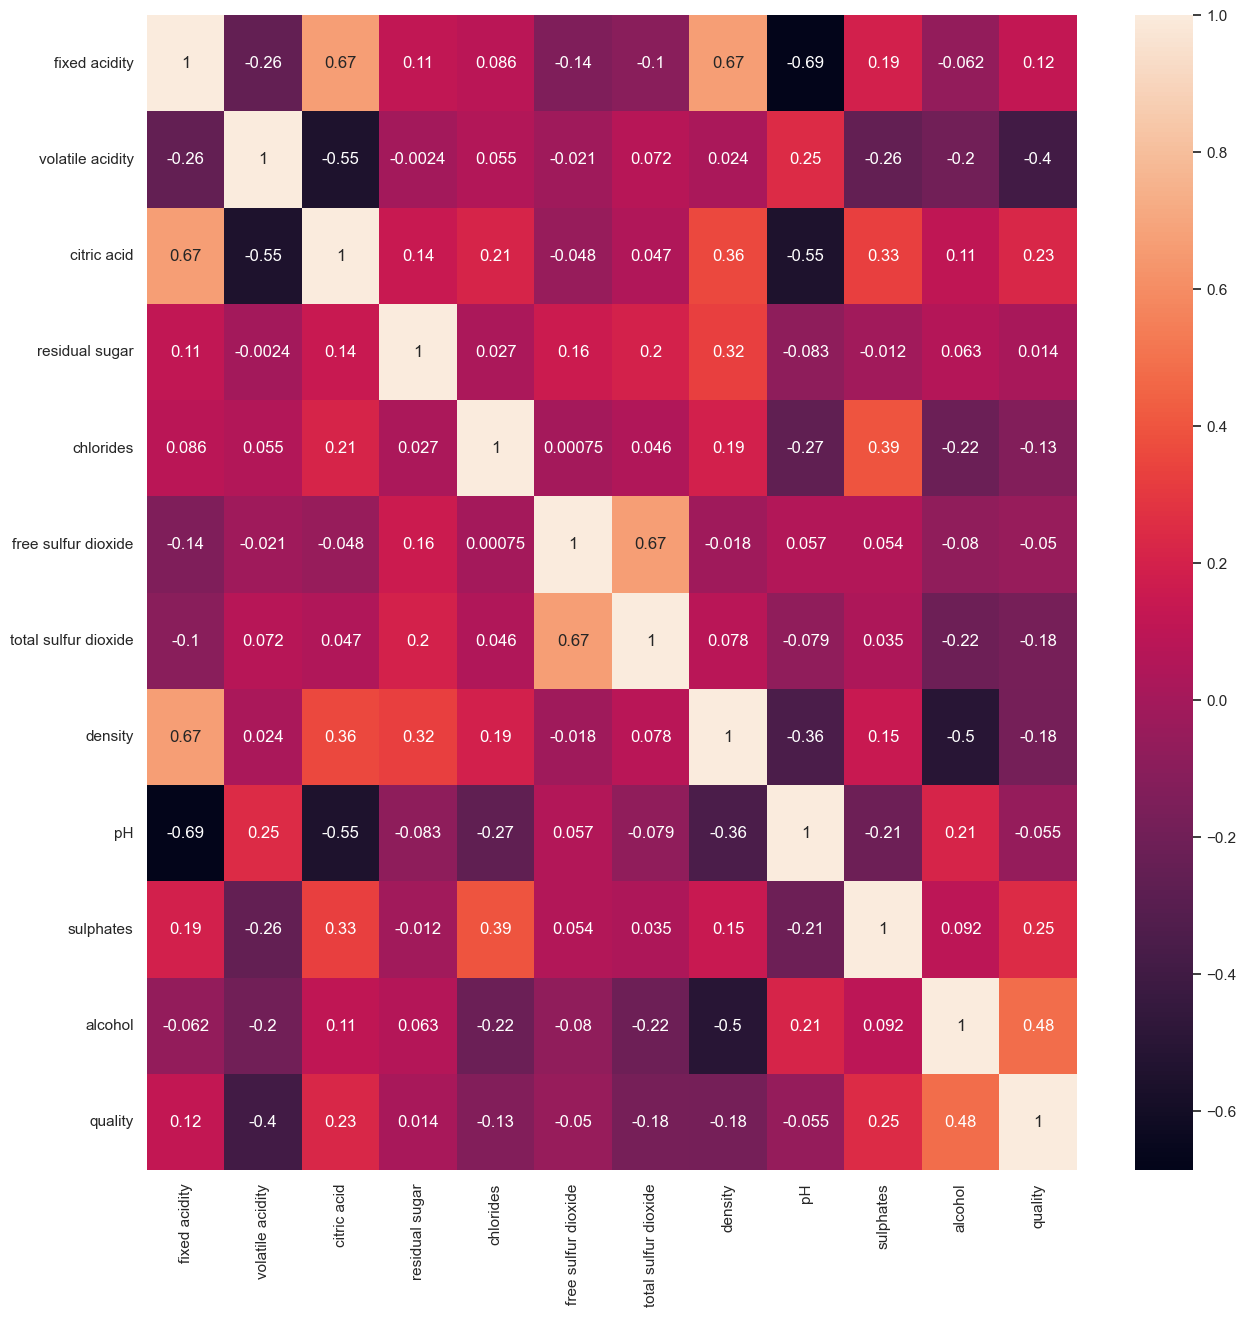

In [15]:
sns.set()
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)
plt.show()

There are no highly correlated varibales in this dataset.

In [13]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [14]:
df['quality'] = [1 if x >= 7 else 0 for x in df['quality']]

df['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

In [15]:
df.sample(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1317            9.9              0.44         0.46             2.2      0.091   
541             9.5              0.46         0.49             6.3      0.064   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1317                 10.0                  41.0  0.99638  3.18       0.69   
541                   5.0                  17.0  0.99880  3.21       0.73   

      alcohol  quality  
1317     11.9        0  
541      11.0        0

In [16]:
x = df.drop(columns = ['quality'], axis = 1)
x.sample(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
340           12.2              0.34         0.50             2.4      0.066   
485           10.2              0.67         0.39             1.9      0.054   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
340                 10.0                  21.0   1.0000  3.12       1.18   
485                  6.0                  17.0   0.9976  3.17       0.47   

     alcohol  
340      9.2  
485     10.0

In [17]:
y = df['quality']
y.sample(2)

1251    0
467     0
Name: quality, dtype: int64

In [18]:
print(x.shape)
print("x variable contain 1359 rows and 11 columns.")
print(y.shape)
print("y variable contain 1359 rows and 1 columns.")

(1359, 11)
x variable contain 1359 rows and 11 columns.
(1359,)
y variable contain 1359 rows and 1 columns.


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 3, stratify = None)

In [20]:
print(x_train.shape)
print("x_train contain 1087 rows and 11 columns.")
print(y_train.shape)
print("y_train contain 1087 rows and 1 columns.")
print(x_test.shape)
print("x_test contain 272 rows and 11 columns.")
print(y_test.shape)
print("y_test contain 272 rows and 1 columns.")

(1087, 11)
x_train contain 1087 rows and 11 columns.
(1087,)
y_train contain 1087 rows and 1 columns.
(272, 11)
x_test contain 272 rows and 11 columns.
(272,)
y_test contain 272 rows and 1 columns.


In [21]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [22]:
x_train = sc.transform(x_train)

In [23]:
x_test = sc.transform(x_test)

In [24]:
x_train = pd.DataFrame(x_train, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
x_train.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1034      -0.868711          0.744749    -1.044513       -0.692347  -0.368207   
636       -0.018919          0.193046    -0.288026       -0.109600  -0.123773   
192       -0.245530          1.324038    -1.397540       -0.400974  -0.083034   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1034             0.020955              0.419693 -0.535987 -0.122166   
636             -0.549681              1.150816  0.828123  0.399365   
192             -0.644787             -0.720859 -0.287486  0.138599   

      sulphates   alcohol  
1034  -0.351067 -1.048255  
636   -0.229186 -0.865541  
192    0.136458  0.413461

In [25]:
x_test = pd.DataFrame(x_test, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
x_test.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
49       -0.812058         -0.634510     0.165866       -0.400974  -0.184881   
23       -0.585447          0.799920    -1.296675       -0.255287  -0.327468   
262      -0.755405         -0.524169    -1.296675       -0.473817  -0.164512   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
49              0.496485              0.127244 -0.028411  1.051279  -0.655770   
23              1.447544              1.326285 -0.567710  0.073408   0.136458   
262            -0.074151             -0.545390 -0.958967  0.268982   0.928685   

      alcohol  
49  -0.865541  
23   0.596175  
262  0.139389

In [26]:
print("standard deviation of train data")
print(x_train.std())
print("****-------------------------------------------------------------------------------------****")
print("standard deviation of test data")
print(x_test.std())

standard deviation of train data
fixed acidity           1.00046
volatile acidity        1.00046
citric acid             1.00046
residual sugar          1.00046
chlorides               1.00046
free sulfur dioxide     1.00046
total sulfur dioxide    1.00046
density                 1.00046
pH                      1.00046
sulphates               1.00046
alcohol                 1.00046
dtype: float64
****-------------------------------------------------------------------------------------****
standard deviation of test data
fixed acidity           0.915485
volatile acidity        1.042316
citric acid             0.922173
residual sugar          0.918535
chlorides               1.028651
free sulfur dioxide     0.966281
total sulfur dioxide    0.878645
density                 0.937246
pH                      1.052097
sulphates               1.186831
alcohol                 0.939169
dtype: float64


## Linear Regression Model

In [27]:
lnr = LinearRegression()
lnr.fit(x_train, y_train)

LinearRegression()

In [31]:
Linear_x_train_data_prediction = np.round(lnr.predict(x_train)).astype(int)
Linear_x_test_data_prediction = np.round(lnr.predict(x_test)).astype(int)

accuracy_score_train = accuracy_score(y_train, Linear_x_train_data_prediction)
accuracy_score_test = accuracy_score(y_test, Linear_x_test_data_prediction)

print("Accuracy score for train data", accuracy_score_train)
print("Accuracy score for test data", accuracy_score_test)

Accuracy score for train data 0.8675252989880404
Accuracy score for test data 0.8823529411764706


## Logistic Regression Model

In [32]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression()

In [33]:
Logistic_x_train_data_prediction = lgr.predict(x_train)
Logistic_x_test_data_prediction = lgr.predict(x_test)

accuracy_score_train = accuracy_score(y_train, Logistic_x_train_data_prediction)
accuracy_score_test = accuracy_score(y_test, Logistic_x_test_data_prediction)

print("Accuracy score for train data", accuracy_score_train)
print("Accuracy score for test data", accuracy_score_test)

Accuracy score for train data 0.8813247470101196
Accuracy score for test data 0.8786764705882353


In [34]:
input_data = (7.7, 0.965, 0.10, 2.1, 0.112, 11.0, 22.0, 0.99630, 3.26, 0.50, 9.5)
input_array = np.asarray(input_data).reshape(1, -1)

Linear_data_prediction = np.round(lnr.predict(input_array)).astype(int)
Logistic_data_prediction = lgr.predict(input_array)

print("Data prediction using Linear Regression : ", Linear_data_prediction)
print("Data prediction using Logistic Regression : ", Logistic_data_prediction)

Data prediction using Linear Regression :  [1]
Data prediction using Logistic Regression :  [1]


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
a = ['Linear Regression','Logistic Regression']
b = [ 0.8675, 0.8786]
results = pd.DataFrame({
    'Model': a,
    'Score': b})
results

Model   Score
0    Linear Regression  0.8675
1  Logistic Regression  0.8786

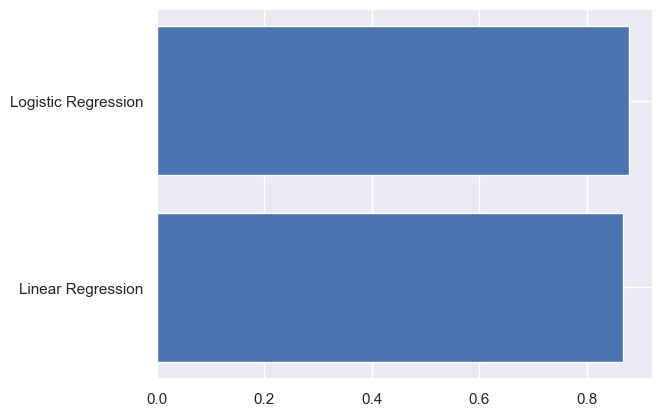

In [33]:
a = np.array(a)
b = np.array(b)

plt.barh(a, b)
plt.show()